In [ ]:
pip install --upgrade transformers peft accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.1/411.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install datasets transformers peft accelerate bitsandbytes
! pip install langchain_community
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import pandas as pd
import numpy as np
from langchain.llms import HuggingFaceHub
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import os
import json
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from peft import get_peft_model, LoraConfig, TaskType
from tqdm import tqdm
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# --- Load EmpatheticDialogues Dataset ---
empathetic_df = pd.read_csv("/content/drive/MyDrive/empathetic_dialogues.csv", on_bad_lines='skip')
empathetic_df= empathetic_df.dropna(subset=["context", "utterance"])
empathetic_df = empathetic_df[empathetic_df["utterance"].apply(lambda x: isinstance(x, str))].reset_index(drop=True)


In [ ]:
empathetic_df.head()

,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,1,I remember going to see the fireworks with my ...,5|5|5_2|2|5,NaN
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,0,Was this a friend you were in love with_comma_...,5|5|5_2|2|5,NaN
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,1,This was a best friend. I miss her.,5|5|5_2|2|5,NaN
3,hit:0_conv:1,4,sentimental,I remember going to the fireworks with my best...,0,Where has she gone?,5|5|5_2|2|5,NaN
4,hit:0_conv:1,5,sentimental,I remember going to the fireworks with my best...,1,We no longer talk.,5|5|5_2|2|5,NaN


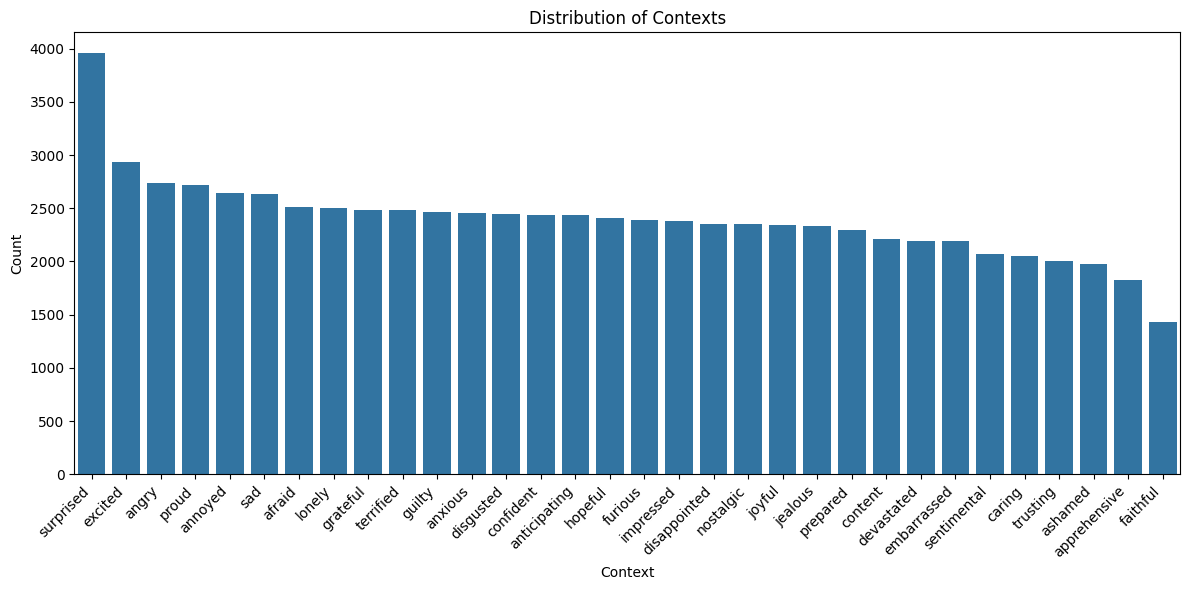

In [ ]:


# Count the occurrences of each context
context_counts = empathetic_df['context'].value_counts()

# Create a bar plot of context counts
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=context_counts.index, y=context_counts.values)
plt.xlabel("Context")
plt.ylabel("Count")
plt.title("Distribution of Contexts")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# --- Load Stress.csv Dataset (for stress types) ---
stress_df = pd.read_csv("/content/drive/MyDrive/Stress.csv")
stress_df = stress_df.dropna(subset=["text"])
stress_df = stress_df[stress_df["text"].apply(lambda x: isinstance(x, str))].reset_index(drop=True)


In [ ]:

# Clean up and rename columns if needed
empathetic_df = empathetic_df.rename(columns={"context": "user", "utterance": "assistant"})
stress_df = stress_df.rename(columns={"text": "user", "subreddit": "stress_type"})

# Drop missing values
empathetic_df.dropna(subset=["user", "assistant"], inplace=True)
stress_df.dropna(subset=["user", "stress_type"], inplace=True)

# Create messages from EmpatheticDialogues
emp_messages = [
    {
        "messages": [
            {"role": "user", "content": row["user"]},
            {"role": "assistant", "content": row["assistant"]}
        ]
    }
    for _, row in tqdm(empathetic_df.iterrows(), total=len(empathetic_df)) # Now you can use tqdm directly
]

# Generate simple templated responses from Stress.csv
def generate_response(stress_type):
    return f"I'm really sorry you're feeling this way. It sounds like you're experiencing {stress_type}. You're not alone—many people go through this. Would you like to talk more about it?"

stress_messages = [
    {
        "messages": [
            {"role": "user", "content": row["user"]},
            {"role": "assistant", "content": generate_response(row["stress_type"])}
        ]
    }
    for _, row in tqdm(stress_df.iterrows(), total=len(stress_df))
]

# Combine all and save to JSONL
all_messages = emp_messages + stress_messages

# Change 'r' to 'w' to write to the file instead of reading from it
with open("/content/drive/MyDrive/llama3_finetune_dataset.jsonl", "w") as f:
    for item in all_messages:
        f.write(json.dumps(item) + "\n")

print(f" Saved {len(all_messages)} examples to finetune_combined.jsonl")

100%|██████████| 2838/2838 [00:00<00:00, 23742.05it/s]


 Saved 79506 examples to finetune_combined.jsonl


In [ ]:
# Shuffle the data for randomness
random.seed(42)
random.shuffle(all_messages)

# Split into train and validation
split_ratio = 0.8
split_index = int(len(all_messages) * split_ratio)

train_data = all_messages[:split_index]
val_data = all_messages[split_index:]

# Save to JSONL format
train_path = "/content/drive/MyDrive/train.jsonl"
val_path = "/content/drive/MyDrive/val.jsonl"

with open(train_path, "w") as f:
    for item in train_data:
        f.write(json.dumps(item) + "\n")

with open(val_path, "w") as f:
    for item in val_data:
        f.write(json.dumps(item) + "\n")

print(f" Split complete!")
print(f" - Train samples: {len(train_data)} saved to {train_path}")
print(f" - Validation samples: {len(val_data)} saved to {val_path}")

 Split complete!
 - Train samples: 63604 saved to /content/drive/MyDrive/train.jsonl
 - Validation samples: 15902 saved to /content/drive/MyDrive/val.jsonl


In [ ]:
from huggingface_hub import login
from transformers import AutoConfig, AutoTokenizer, AutoModelForCausalLM

# --- HuggingFace Inference Setup (Switch to LLaMA 3) ---
login(token="hf_SAXsDuZzidPssAeMEkRuUaddtoken")
# Model ID for LLaMA 3 Instruct
model_id = "mistralai/Mistral-7B-Instruct-v0.1"

# Load train and validation datasets (already split and saved)
data_files = {
    "train": "/content/drive/MyDrive/train.jsonl",
    "validation": "/content/drive/MyDrive/val.jsonl"
}

dataset = load_dataset("json", data_files=data_files)
# Subsample both train and validation datasets
def subsample(dataset_split, fraction=0.3):  # 0.02 = 2%
    n = max(1, int(len(dataset_split) * fraction))  # ensure at least 1 sample
    return dataset_split.shuffle(seed=42).select(range(n))

# Apply subsampling
subsampled_train = subsample(dataset["train"])
subsampled_val = subsample(dataset["validation"])

print(f"Subsampled: {len(subsampled_train)} training examples, {len(subsampled_val)} validation examples")


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Subsampled: 19081 training examples, 4770 validation examples


In [ ]:
from transformers import BitsAndBytesConfig
from transformers import default_data_collator


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType
from datasets import load_dataset
from transformers import DataCollatorForSeq2Seq
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

print("Loading tokenizer and model...")
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map={"": "cuda:0"},
    quantization_config=bnb_config,
    trust_remote_code=True
)

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

model = get_peft_model(model, lora_config)


# --- Tokenization ---
def tokenize(example):
    text = tokenizer.apply_chat_template(example["messages"], tokenize=False)
    tokens = tokenizer(text, padding="max_length", truncation=True, max_length=256)
    return {
        "input_ids": tokens["input_ids"],
        "attention_mask": tokens["attention_mask"],
        "labels": tokens["input_ids"]
    }

print("Tokenizing dataset...")
tokenized_train = subsampled_train.map(tokenize, remove_columns=subsampled_train.column_names)
tokenized_val = subsampled_val.map(tokenize, remove_columns=subsampled_val.column_names)


# --- Step 4: Training ---
training_args = TrainingArguments(
    output_dir="./mistral-lora-checkpoint",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,
    logging_steps=10,
    num_train_epochs=1,
    learning_rate=2e-4,
    fp16=True,
    save_strategy="epoch",
    eval_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, pad_to_multiple_of=8, return_tensors="pt")
)

print("Training started...")
trainer.train()

# Save fine-tuned model
print("Saving fine-tuned model...")
model.save_pretrained("./mistral-lora-finetuned")
tokenizer.save_pretrained("./mistral-lora-finetuned")
print(" Fine-tuning complete!")


Loading tokenizer and model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Tokenizing dataset...


Map:   0%|          | 0/19081 [00:00<?, ? examples/s]

Map:   0%|          | 0/4770 [00:00<?, ? examples/s]

<ipython-input-13-f545eb0e7e16>:67: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Training started...


Epoch,Training Loss,Validation Loss
0,0.273000,0.232397


Saving fine-tuned model...
 Fine-tuning complete!


In [ ]:
import zipfile
import os

def zipdir(path, ziph):
    # Zip the directory
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(path, '..')))

zipf = zipfile.ZipFile('mistral-lora-finetuned.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('./mistral-lora-finetuned', zipf)
zipf.close()

from google.colab import files
files.download('mistral-lora-finetuned.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>